

# EDA on InsaidTelecom

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
**4.** [**Data Acquisition & Description**](#Section4)<br>
   - **4.1** [**Acquiring data from SQL Database and local machine**](#Section4.1)<br>
   
      - **4.1.1** [**EVENT DATA**](#Section411)<br>
      - **4.1.2** [**Phone Model Data**](#Section412)<br>
      - **4.1.3** [**Gender Age Train Data**](#Section413)<br>
      
**5.** [**Data Pre-Profiling**](#Section5)<br>
**6.** [**Data Cleaning**](#Section6)<br>
  - **6.1** [**Missing Values Imputation in Event dataset for  State , Device ID , Latitude & Longitude columns**](#Section6.1)<br>
       - **6.1.1** [**Missing value treatment for State**](#Section6.1.1)<br>
       - **6.1.2** [**Missing value treatment for Device ID**](#Section6.1.2)<br>
       - **6.1.3** [**Missing value treatment for Latitude and longitude**](#Section6.1.3)<br>
       - **6.1.4** [**Analyse Lattitude and Longitude information using Plotly and Folium Packages (Inappropriate Data Fix)**](#Section6.1.4)<br>                
       
  - **6.2** [**Converting Chinese to English transalation for device model**](#Section6.2)<br>
  - **6.3** [**Converting chinese to English translation for Phone Brand**](#Section6.3)<br>
  - **6.4** [**Fixing outlier in Age column**](#Section6.4)<br>
  - **6.5** [**Extracting Data for target states from the Event Data For EDA**](#Section6.5)<br>
  - **6.6** [**Merging of all Datasets For EDA**](#Section6.6)<br>
   
             
**7.** [**Data Post-Profiling**](#Section7)<br>
**8.** [**Exploratory Data Analysis on Final Data**](#Section8)<br>










**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>
  - **9.2** [**Actionable Insights**](#Section92)<br>

<a name = Section1></a>
### 1.Company Introduction

- Your company for this project is InsaidTelecom.

- InsaidTelecom, one of the leading telecom players, understands that customizing offerings is very important for its business to stay competitive.
- Currently, InsaidTelecom is seeking to leverage behavioural data from more than 60% of the 50 million mobile devices active daily in India
- They are doing this to help their clients better understand and interact with their audiences.


<a name = Section2></a>
### 2.Problem Statement 

- In this consulting assignment, we are expected to build a dashboard.
- This dashboard will help us to understand a user's demographic characteristics based on their mobile usage, geolocation, and mobile device properties
- Doing so will help millions of developers and brand advertisers around the world pursue data-driven marketing efforts.
- These efforts are relevant to their users and cater to their preferences.

<a name = Section3></a>
### 3. Installing & Importing Libraries
   


In [1]:
# !pip install -q datascience                                         # A package that is required by pandas-profiling library
# !pip install -q pandas-profiling                                    # A library to generate basic statistics about data
# !pip install MySQL-connector-python

In [2]:
# !pip install folium

In [3]:
# !pip install -q --upgrade pandas-profiling

In [4]:
# !pip install geopy

In [5]:
import pandas as pd
from pandas_profiling import ProfileReport                          # Importing Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface of matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import plotly.graph_objs as go                                      # For interactive graphs
#-------------------------------------------------------------------------------------------------------------------------------
import datetime                                                     # For datetime operations
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
import folium
from folium.plugins import FastMarkerCluster
from geopy.geocoders import Nominatim

<a name = Section4></a>
### 4. Data Acquisition & Description

- In this assignment, you are going to study the demographics of a user (gender and age) based on their app download and usage behaviours.
- The Data is collected from mobile apps that use Inside Telecom services. Full recognition and consent from an individual user of those apps have been obtained,and appropriate anonymization has been performed to protect privacy. Due to confidentiality, we won't provide details on how the gender and age data were obtained.
- Please treat them as accurate ground truth for prediction.
- The data schema can be represented in the following table:
    - **gender_age_train** - Devices and their respective user gender, age and age_group
    - **phone_brand_device_model** - device ids, brand, and models phone_brand: note that few brands are in Chinese


|Brand Name    |	Brand English Mapping  |
|-----------| ------------    | 
|'华为'|Huawei'|
|'小米'|'Xiaomi'|
|'三星'|'Samsung'|
|'vivo'|'vivo'|
|'OPPO'	|'OPPO'|
|'魅族'|'Meizu'|
|'酷派'|'Coolpad'|
|'乐视'|'LeEco'|
|'联想 '|'Lenovo'|
|'HTC'|'HTC'|

- **Events_data**:
    - When a user uses mobile on an INSAID Telecom network, the event gets logged in this data.
    - Each event has an event id, location (lat/long), and the event corresponds to the frequency of mobile usage.
    - timestamp: when the user is using the mobile.
                  
    


<a name = Section4.1></a>
### 4.1 Acquiring data from SQL Database and local machine 

<a name = #Section4.1.1></a>
### 4.1.1 EVENT DATA

In [6]:
event_data = pd.read_csv('C://Users/Administrator/Desktop/INSAID/CAPSTONE PROJECT EDA/events_data.csv')

In [7]:
print('Shape of Event Data is : ' , event_data.shape)
event_data.head()

Shape of Event Data is :  (3252950, 7)


event_id                  device_id            timestamp  longitude  \
0   2765368  2973347786994914304.00000  2016-05-07 22:52:05   77.22568   
1   2955066  4734221357723754496.00000  2016-05-01 20:44:16   88.38836   
2    605968 -3264499652692492800.00000  2016-05-02 14:23:04   77.25681   
3    448114  5731369272434022400.00000  2016-05-03 13:21:16   80.34361   
4    665740   338888002570799936.00000  2016-05-06 03:51:05   85.99774   

   latitude      city       state  
0  28.73014     Delhi       Delhi  
1  22.66033  Calcutta  WestBengal  
2  28.75791     Delhi       Delhi  
3  13.15333   Chennai   TamilNadu  
4  23.84261    Bokaro   Jharkhand

In [8]:
event_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  float64
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


In [9]:
event_data.describe(include = 'all')

event_id                  device_id            timestamp  \
count  3252950.00000              3252497.00000              3252950   
unique           NaN                        NaN               588126   
top              NaN                        NaN  2016-05-03 10:00:03   
freq             NaN                        NaN                   43   
mean   1626475.50000   101220009585509024.00000                  NaN   
std     939045.92342  5316758188197051392.00000                  NaN   
min          1.00000 -9222956879900150784.00000                  NaN   
25%     813238.25000 -4540611333857475072.00000                  NaN   
50%    1626475.50000   172682011159278816.00000                  NaN   
75%    2439712.75000  4861813234983622656.00000                  NaN   
max    3252950.00000  9222849349208140800.00000                  NaN   

           longitude      latitude     city    state  
count  3252527.00000 3252527.00000  3252950  3252573  
unique           NaN           NaN      933       32  
top              NaN           NaN    Delhi    Delhi  
freq             NaN           NaN   744276   751733  
mean        78.15868      21.68851      NaN      NaN  
std          4.23557       5.78911      NaN      NaN  
min         12.56700       8.19011      NaN      NaN  
25%         75.83543      17.80171      NaN      NaN  
50%         77.26814      22.16454      NaN      NaN  
75%         80.31916      28.68278      NaN      NaN  
max         95.45946      41.87190      NaN      NaN

In [10]:
#Checking missing values 
event_data.isnull().sum()

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state        377
dtype: int64

In [11]:
# Displaying percentage of null values in event data
event_data.isnull().sum()/event_data.isnull().count()*100

event_id    0.00000
device_id   0.01393
timestamp   0.00000
longitude   0.01300
latitude    0.01300
city        0.00000
state       0.01159
dtype: float64

In [12]:
event_data_city = event_data.groupby(['device_id'])['city'].nunique().reset_index()
print(event_data_city.shape)


(60865, 2)


**Observations**

- There are 7 features with 3252950 observations in event dataset . 
- Timestamp is a datetime dtype but showing object , we need to convert it in to datetime64.
- From the above data information found that there are missing values in columns device_id ,latitude,longitude & state. 
- 377 Null Values in States which is about 0.01% of total data.
- 423 Null Values in Latitude & Longitude data which is about 0.013% of total data.
- 453 Null Values in device_id data which is about 0.014% of total data.
- We have 60865 unique Devices for which events(usage) data has been captured.
- There are outliers in the latitude & longitude column , which means wrong information about the city/state.

**Getting the user data from SQL server**

In [13]:
# # Importing MYSQL connector
# import mysql.connector


# mydb = mysql.connector.connect(
#      host ='cpanel.insaid.co',
#      user = 'student',
#      password ='student',
# database='Capstone1',
#     auth_plugin='mysql_native_password',
    
# )


In [14]:
# # Acquiring gender_age_train dataset from MYSQL database
# sql_query = pd.read_sql_query('select * from gender_age_train',mydb) 
# df = pd.DataFrame(sql_query)
# df.to_csv (r'C:\Users\Administrator\Desktop\INSAID\CAPSTONE PROJECT EDA\gender_age_train.csv', index = False) 

In [15]:
# # Acquiring phone_brand_device_model dataset from MYSQL database
# sql_query = pd.read_sql_query('select * from phone_brand_device_model',mydb) 
# df = pd.DataFrame(sql_query)
# df.to_csv (r'C:\Users\Administrator\Desktop\INSAID\CAPSTONE PROJECT EDA\phone_brand_device_model.csv', index = False) 

<a name = #Section4.1.2></a>
### 4.1.2 Phone Model Data

In [16]:
phone_model = pd.read_csv('C://Users/Administrator/Desktop/INSAID/CAPSTONE PROJECT EDA/phone_brand_device_model.csv')
phone_model.head()

device_id phone_brand device_model
0  1877775838486905855        vivo          Y13
1 -3766087376657242966          小米         V183
2 -6238937574958215831        OPPO          R7s
3  8973197758510677470          三星        A368t
4 -2015528097870762664          小米      红米Note2

In [17]:
phone_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  int64 
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [18]:
phone_model.isnull().sum()

device_id       0
phone_brand     0
device_model    0
dtype: int64

In [19]:
phone_model.describe(include ='all')

device_id phone_brand device_model
count                 87726.00000       87726        87726
unique                        NaN         116         1467
top                           NaN          小米       红米note
freq                          NaN       21645         3500
mean      -5212556568047306.00000         NaN          NaN
std     5330156982713820160.00000         NaN          NaN
min    -9223321966609553408.00000         NaN          NaN
25%    -4623331173682123776.00000         NaN          NaN
50%      -31098020763804488.00000         NaN          NaN
75%     4635193992006549504.00000         NaN          NaN
max     9222849349208140800.00000         NaN          NaN

**Observations**

- There are 3 features with 87726 observations. 
- Dtype of device id showing int, for further analysis we need to convert it into float.
- No missing values in the data . 
- Device_model & phone_brand columns have some unique values ( chinese name ) , which need to be mapped with english name .

<a name = #Section4.1.3></a>
### 4.1.3 Gender Age Train Data

In [20]:
gender_age_train = pd.read_csv('C://Users/Administrator/Desktop/INSAID/CAPSTONE PROJECT EDA/gender_age_train.csv')
gender_age_train.head()

device_id gender  age   group
0 -8076087639492063270      M   35  M32-38
1 -2897161552818060146      M   35  M32-38
2 -8260683887967679142      M   35  M32-38
3 -4938849341048082022      M   30  M29-31
4   245133531816851882      M   30  M29-31

In [21]:
gender_age_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [22]:
gender_age_train.isnull().sum()

device_id    0
gender       0
age          0
group        0
dtype: int64

In [23]:
gender_age_train.describe(include = 'all')

device_id gender         age   group
count                 74645.00000  74645 74645.00000   74645
unique                        NaN      2         NaN      12
top                           NaN      M         NaN  M23-26
freq                          NaN  47904         NaN    9605
mean       -749135388419837.00000    NaN    31.41034     NaN
std     5327149733911456768.00000    NaN     9.86873     NaN
min    -9223067244542181376.00000    NaN     1.00000     NaN
25%    -4617366812584264704.00000    NaN    25.00000     NaN
50%      -18413620249632024.00000    NaN    29.00000     NaN
75%     4636655899093149696.00000    NaN    36.00000     NaN
max     9222849349208140800.00000    NaN    96.00000     NaN

**Observations**

- There are 4 features with 74645 observations. 
- No missing values in the data . 
- The age feature ranges from 1 to 96 years..
- Looking at the minimum and max value of the age feature, we can see that either typo error or 1 year old kid using that mobile at that location, which is little starnge .so we can consider this as an outlier.
- Age column is right skewed.
- Males in the age between 23 and 26 are using their mobiles maximum number of times

In [24]:
print('Shape of Event Data is : ', event_data.shape)
print('Shape of Phone Brand model is :', phone_model.shape)
print('Shape of Gender age train is : ', gender_age_train.shape)

Shape of Event Data is :  (3252950, 7)
Shape of Phone Brand model is : (87726, 3)
Shape of Gender age train is :  (74645, 4)


<a name = Section5></a>
### 5. Data Pre-Profiling 

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [25]:
# profile = ProfileReport(df = event_data)
# profile.to_file(output_file = 'Pre Profiling Report-event data.html')
# print('Accomplished!')

In [26]:
# profile = ProfileReport(df = phone_model)
# profile.to_file(output_file = 'Pre Profiling Report-phone model.html')
# print('Accomplished!')

In [27]:
# profile = ProfileReport(df = gender_age_train)
# profile.to_file(output_file = 'Pre Profiling Report-gender age.html')
# print('Accomplished!')

**Observations:**

- There are **7 features** with **32,52,950 observations** in **event dataset**.

- There are **3 features** with **87,726 observations** in **phone model** dataset.

- There are **4 features** with **74,645 observations** in **gender age train** dataset.

- There are **4 Numeric and 3 Categorical** variables in **event dataset**.

- **1676 (< 0.1%) cells** have **missing** valuesin **event dataset**

- **Phone model and gender age train** data **does no**t have any **missing values** . 

- Missing values are from the **Latitude** , **Device_id** , **State** and **longitude** feature.

- Dataset has **0 duplicate rows**.

- **group** is highly **correlated** with **gender and age**.

- **Latitude and Longitude** are highly **correlated** to each other and with **state**.

- **Device_model & phone_brand** have some unique values.



<a name = Section6></a>
### 6.Data Cleaning 

<a name = Section6.1></a>
### 6.1 Missing Values Imputation in Event dataset for  State , Device ID , Latitude & Longitude columns

In [28]:
null_state = event_data[event_data['state'].isnull()]
null_state.head()

event_id                  device_id            timestamp  longitude  \
2931     706554 -5829328361235250176.00000  2016-05-05 16:58:46   73.85167   
16243   1918653  3137053756433768448.00000  2016-05-03 00:46:10   83.32671   
26956   1068940 -1752057305775059712.00000  2016-05-04 16:09:17   75.93097   
30889   2164200  -394582654031064128.00000  2016-05-04 19:33:09   83.36656   
32685    460124  5536513450525271040.00000  2016-05-01 21:30:10   80.35980   

       latitude           city state  
2931   18.59331           Pune   NaN  
16243  17.82975  Visakhapatnam   NaN  
26956  22.81884         Indore   NaN  
30889  17.75719  Visakhapatnam   NaN  
32685  13.12817        Chennai   NaN

In [29]:
null_device_id = event_data.loc[event_data['device_id'].isnull()]
null_device_id.head()

event_id  device_id            timestamp  longitude  latitude  \
2055    1936567        NaN  2016-05-02 15:27:54   75.88296  22.81452   
26367   2659282        NaN  2016-05-04 14:06:24   75.88849  26.94869   
42088    442198        NaN  2016-05-06 09:27:37   75.84601  26.96080   
43061   1903648        NaN  2016-05-02 15:41:54   75.92333  22.77778   
44823   3227383        NaN  2016-05-05 08:37:09   75.99255  31.56175   

             city          state  
2055       Indore  MadhyaPradesh  
26367      Jaipur      Rajasthan  
42088      Jaipur      Rajasthan  
43061      Indore  MadhyaPradesh  
44823  Hoshiarpur         Punjab

In [30]:
event_data.loc[event_data['event_id'] == 1936567]

event_id  device_id            timestamp  longitude  latitude    city  \
2055   1936567        NaN  2016-05-02 15:27:54   75.88296  22.81452  Indore   

              state  
2055  MadhyaPradesh

In [43]:
event_data.groupby(['longitude','latitude'])

In [ ]:
null_latitude = event_data.loc[event_data['latitude'].isnull()]
null_latitude.head()

In [ ]:
null_longitude = event_data.loc[event_data['longitude'].isnull()]
null_longitude.head()

<a name = Section6.1.1></a>
### 6.1.1 Missing value treatment for State

In [ ]:
event_data['state'].value_counts()

In [ ]:
# Checking for no of cities and states in event data 
event_data_city = event_data.filter(['city','state'],axis=1)
event_data_city.describe()

There are 32 states with 933 cities in this dataset with delhi being that top city . 

In [ ]:
null_state.describe(include= 'all')

9 cities for which state is missing , with help of plot will check now which are those cities. 

In [ ]:
plt.figure()
null_state['city'].value_counts().plot.bar()
plt.ylabel("Null Count")
plt.xlabel("Cities")
plt.show()


In [ ]:
state_null = event_data.dropna(subset=['state']).drop_duplicates('city').set_index('city')['state']
event_data['state']=event_data['state'].fillna(event_data['city'].map(state_null))
event_data.isnull().sum()

**Missing states have been filled with same city records** 

<a name = Section6.1.2></a>
### 6.1.2 Missing value treatment for Device ID

In [ ]:
null_device_id.describe(include ='all')

In [34]:
null_device_id.head()

event_id  device_id            timestamp  longitude  latitude  \
2055    1936567        NaN  2016-05-02 15:27:54   75.88296  22.81452   
26367   2659282        NaN  2016-05-04 14:06:24   75.88849  26.94869   
42088    442198        NaN  2016-05-06 09:27:37   75.84601  26.96080   
43061   1903648        NaN  2016-05-02 15:41:54   75.92333  22.77778   
44823   3227383        NaN  2016-05-05 08:37:09   75.99255  31.56175   

             city          state  
2055       Indore  MadhyaPradesh  
26367      Jaipur      Rajasthan  
42088      Jaipur      Rajasthan  
43061      Indore  MadhyaPradesh  
44823  Hoshiarpur         Punjab

In [236]:
#getting non null device id list with latitude 
device_null = event_data.dropna(subset=['device_id']).drop_duplicates('latitude').drop_duplicates('longitude').set_index('latitude')['device_id']
device_null.head(20)

latitude
28.73014    2973347786994914304.00000
22.66033    4734221357723754496.00000
28.75791   -3264499652692492800.00000
13.15333    5731369272434022400.00000
23.84261     338888002570799936.00000
17.76815    -512424213979236416.00000
13.12817    5536513450525271040.00000
16.39033   -8879643774076165120.00000
28.75791    3020769016382465536.00000
18.97493    4928555839839670272.00000
13.11543   -3433061233631405568.00000
18.61579    3978025911571213824.00000
17.82858    -601883305299256832.00000
28.75838   -3090166955280575488.00000
13.18905    7983871429718484992.00000
13.17297    7594215820567964672.00000
13.16931   -2168523477348251648.00000
28.71566    7566051280927281152.00000
28.73796   -3656132883647868928.00000
13.17973    3644267756307556352.00000
Name: device_id, dtype: float64

count                  60178.00000
mean        1721082254603093.50000
std      5325854269128429568.00000
min     -9222956879900150784.00000
25%     -4614932281312815104.00000
50%       -19665387346975040.00000
75%      4632113480993060864.00000
max      9222849349208140800.00000
Name: device_id, dtype: float64

In [36]:
event_data['device_id'] = event_data['device_id'].fillna(event_data['latitude'].map(device_null))
event_data.isnull().sum()

event_id       0
device_id      0
timestamp      0
longitude    423
latitude     423
city           0
state          0
dtype: int64

<a name = Section6.1.3></a>
### 6.1.3 Missing value treatment for Latitude and longitude

In [37]:
null_latitude.describe(include = 'all')

event_id                  device_id            timestamp  \
count      423.00000                  423.00000                  423   
unique           NaN                        NaN                  422   
top              NaN                        NaN  2016-05-07 19:08:10   
freq             NaN                        NaN                    2   
mean   1794087.98818  2824702047345898496.00000                  NaN   
std     935867.53820  4715207708880104448.00000                  NaN   
min      35313.00000 -8790560034584249344.00000                  NaN   
25%     945022.00000  1779631023439405312.00000                  NaN   
50%    2038959.00000  4580179444377397760.00000                  NaN   
75%    2560541.50000  5518659601894557696.00000                  NaN   
max    3250000.00000  7983871429718484992.00000                  NaN   

        longitude  latitude    city      state  
count     0.00000   0.00000     423        423  
unique        NaN       NaN       9          8  
top           NaN       NaN  Jaipur  Rajasthan  
freq          NaN       NaN      66         66  
mean          NaN       NaN     NaN        NaN  
std           NaN       NaN     NaN        NaN  
min           NaN       NaN     NaN        NaN  
25%           NaN       NaN     NaN        NaN  
50%           NaN       NaN     NaN        NaN  
75%           NaN       NaN     NaN        NaN  
max           NaN       NaN     NaN        NaN

In [38]:
latitude_null = event_data.dropna(subset=['latitude']).drop_duplicates('device_id').set_index('device_id')['latitude']
latitude_null.head()

device_id
2973347786994914304.00000    28.73014
4734221357723754496.00000    22.66033
-3264499652692492800.00000   28.75791
5731369272434022400.00000    13.15333
338888002570799936.00000     23.84261
Name: latitude, dtype: float64

In [39]:
event_data['latitude'] = event_data['latitude'].fillna(event_data['device_id'].map(latitude_null))
event_data.isnull().sum()

event_id       0
device_id      0
timestamp      0
longitude    423
latitude       0
city           0
state          0
dtype: int64

In [40]:
longitude_null = event_data.dropna(subset=['longitude']).drop_duplicates('device_id').set_index('device_id')['longitude']

longitude_null.head()

device_id
2973347786994914304.00000    77.22568
4734221357723754496.00000    88.38836
-3264499652692492800.00000   77.25681
5731369272434022400.00000    80.34361
338888002570799936.00000     85.99774
Name: longitude, dtype: float64

In [41]:

event_data['longitude'] = event_data['longitude'].fillna(event_data['device_id'].map(longitude_null))
event_data.isnull().sum()


event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

**There is no missing value in the event dataset.**

<a name = Section6.1.4></a>
### 6.1.4 Analyse Lattitude and Longitude information using Plotly and Folium Packages (Inappropriate Data Fix)

In [42]:
event_data.groupby(['longitude','latitude','state','city','device_id']).count()[:20]

event_id  \
longitude latitude state         city          device_id                              
12.56700  41.87190 Maharashtra   Pune          -3300282771940051456.00000         3   
12.56740  41.87190 AndhraPradesh Visakhapatnam 9078282559555458048.00000          3   
                   Bihar         Purnia        6171733141545328640.00000          3   
                   Delhi         Delhi         -1448078833416777984.00000         3   
                   MadhyaPradesh Indore        -2796107298017636352.00000         3   
                   Rajasthan     Jaipur        4718752803626400768.00000          3   
                   TamilNadu     Chennai       -170254198178616704.00000          3   
55.27080  25.20480 AndhraPradesh Visakhapatnam -8647958547458784256.00000         3   
                   Delhi         Delhi         2334568628287627776.00000          3   
                   Karnataka     Ilkal         -6903863101719990272.00000         3   
                   MadhyaPradesh Indore        889350735582174848.00000           3   
                   Maharashtra   Pune          436980604655174336.00000           3   
                   Rajasthan     Bari          -1926548054995953664.00000         3   
                   TamilNadu     Chennai       348551303690779904.00000           3   
69.20750  34.55530 AndhraPradesh Visakhapatnam -601883305299256832.00000          3   
                   Bihar         Masaurhi      -7165635156926407680.00000         3   
                   Delhi         Delhi         1057289835566390656.00000          3   
                   MadhyaPradesh Indore        8997995259821809664.00000          3   
                   Maharashtra   Pune          4995976326034236416.00000          3   
                   Rajasthan     Jaipur        -3693510914308259840.00000         3   

                                                                           timestamp  
longitude latitude state         city          device_id                              
12.56700  41.87190 Maharashtra   Pune          -3300282771940051456.00000          3  
12.56740  41.87190 AndhraPradesh Visakhapatnam 9078282559555458048.00000           3  
                   Bihar         Purnia        6171733141545328640.00000           3  
                   Delhi         Delhi         -1448078833416777984.00000          3  
                   MadhyaPradesh Indore        -2796107298017636352.00000          3  
                   Rajasthan     Jaipur        4718752803626400768.00000           3  
                   TamilNadu     Chennai       -170254198178616704.00000           3  
55.27080  25.20480 AndhraPradesh Visakhapatnam -8647958547458784256.00000          3  
                   Delhi         Delhi         2334568628287627776.00000           3  
                   Karnataka     Ilkal         -6903863101719990272.00000          3  
                   MadhyaPradesh Indore        889350735582174848.00000            3  
                   Maharashtra   Pune          436980604655174336.00000            3  
                   Rajasthan     Bari          -1926548054995953664.00000          3  
                   TamilNadu     Chennai       348551303690779904.00000            3  
69.20750  34.55530 AndhraPradesh Visakhapatnam -601883305299256832.00000           3  
                   Bihar         Masaurhi      -7165635156926407680.00000          3  
                   Delhi         Delhi         1057289835566390656.00000           3  
                   MadhyaPradesh Indore        8997995259821809664.00000           3  
                   Maharashtra   Pune          4995976326034236416.00000           3  
                   Rajasthan     Jaipur        -3693510914308259840.00000          3

**Observations**

- Some of the rows have same values of longitude and latitude for cities 'Visakhapatnam','Pune','Chennai','Delhi','Indore', 'Jaipur'. This seems to be inappropriate.
- As per our case study , we only need to analyze on 6 states 'TamilNadu','Manipur','Chandigarh', 'Tripura','UttarPradesh','ArunachalPradesh'.

- We will do further analysis on this 

In [43]:
event_data[(event_data['state'] == 'TamilNadu') & (event_data['latitude']>25)].sort_values(['latitude'])

event_id                 device_id            timestamp  longitude  \
533423     548055  348551303690779904.00000  2016-05-03 12:32:08   55.27080   
2393743    601176  348551303690779904.00000  2016-05-06 12:21:51   55.27080   
2847570    352256  348551303690779904.00000  2016-05-02 17:12:53   55.27080   
22269     2896853 7758074839281444864.00000  2016-05-02 05:48:31   69.20750   
1080564   3203806 7758074839281444864.00000  2016-05-01 21:16:33   69.20750   
2575568   3175643 7758074839281444864.00000  2016-05-01 05:13:10   69.20750   
91260      563738 -170254198178616704.00000  2016-05-02 01:05:02   12.56740   
245718     351833 -170254198178616704.00000  2016-05-04 16:26:38   12.56740   
291818     594503 -170254198178616704.00000  2016-05-06 06:17:27   12.56740   

         latitude     city      state  
533423   25.20480  Chennai  TamilNadu  
2393743  25.20480  Chennai  TamilNadu  
2847570  25.20480  Chennai  TamilNadu  
22269    34.55530  Chennai  TamilNadu  
1080564  34.55530  Chennai  TamilNadu  
2575568  34.55530  Chennai  TamilNadu  
91260    41.87190  Chennai  TamilNadu  
245718   41.87190  Chennai  TamilNadu  
291818   41.87190  Chennai  TamilNadu

In [44]:
# To check the lat & log points of our sates in neighbouring states ,
# added 'Delhi','AndhraPradesh','Pondicherry','MadhyaPradesh','Karnataka' to list 
target_states = ['TamilNadu','Manipur','Chandigarh','Tripura','UttarPradesh','ArunachalPradesh','Delhi','AndhraPradesh','Pondicherry','MadhyaPradesh','Kerala','Karnataka']
state_list = event_data.groupby(['longitude','latitude','city','state','device_id']).count().index.tolist()
event_data_index = pd.DataFrame(state_list,columns=['longitude','latitude','city','state','device_id'])
event_data_index = event_data_index[event_data_index.state.isin(target_states)]
event_data_index.head(10)

longitude  latitude           city          state  \
1    12.56740  41.87190        Chennai      TamilNadu   
2    12.56740  41.87190          Delhi          Delhi   
3    12.56740  41.87190         Indore  MadhyaPradesh   
6    12.56740  41.87190  Visakhapatnam  AndhraPradesh   
8    55.27080  25.20480        Chennai      TamilNadu   
9    55.27080  25.20480          Delhi          Delhi   
10   55.27080  25.20480          Ilkal      Karnataka   
11   55.27080  25.20480         Indore  MadhyaPradesh   
13   55.27080  25.20480  Visakhapatnam  AndhraPradesh   
14   69.20750  34.55530        Chennai      TamilNadu   

                    device_id  
1   -170254198178616704.00000  
2  -1448078833416777984.00000  
3  -2796107298017636352.00000  
6   9078282559555458048.00000  
8    348551303690779904.00000  
9   2334568628287627776.00000  
10 -6903863101719990272.00000  
11   889350735582174848.00000  
13 -8647958547458784256.00000  
14  7758074839281444864.00000

In [45]:
event_data_index.groupby('state')['device_id'].count()

state
AndhraPradesh       4932
ArunachalPradesh      32
Chandigarh            35
Delhi               4912
Karnataka           6482
Kerala               939
MadhyaPradesh       3223
Manipur               30
Pondicherry           96
TamilNadu           5773
Tripura               36
UttarPradesh        3660
Name: device_id, dtype: int64

In [118]:
# state_arn_cha_tri for states ArunachalPradesh , Chandigarh and Tripura 
state_arn_cha_tri = event_data_index[event_data_index['state'].isin (['ArunachalPradesh','Chandigarh','Tripura'])]

# state_man_utt for states Manipur and UttarPradesh 
state_man_utt = event_data_index[event_data_index['state'].isin (['Manipur','UttarPradesh'])]

#state_TN for state TamilNadu
state_TN = event_data_index[event_data_index['state'].isin (['TamilNadu'])]

In [116]:
data = [go.Scattergeo(lat = state_arn_cha_tri['latitude'] , 
                      lon = state_arn_cha_tri['longitude'] ,
                      text = (state_arn_cha_tri['city'] + ',' + state_arn_cha_tri['state']),
                      name = '',
                    marker = dict(size =5 , autocolorscale = True , colorbar = dict(title ='City map')))]
layout = go.Layout(title=go.layout.Title(text='Data Points for ArunachalPradesh,Chandigarh and Tripura'), showlegend=True,
                   geo=go.layout.Geo(resolution=110, scope='asia', showframe=True, showcoastlines=True,
                                     landcolor="rgb(299, 299, 299)", countrycolor="black", coastlinecolor="black"))
fig = go.Figure(data=data, layout=layout)
fig.show() 

In [119]:
# import plotly.graph_objs as go
# data = [go.Scattergeo(lon=event_data_index[event_data_index.state.isin (['ArunachalPradesh','Chandigarh','Tripura'])]['longitude'], 
#                       lat =event_data_index[event_data_index.state.isin (['ArunachalPradesh','Chandigarh','Tripura'])]['latitude'], 
#                       text =(event_data_index[event_data_index.state.isin (['ArunachalPradesh','Chandigarh','Tripura'])]['city']+','+event_data_index[event_data_index.state.isin (['ArunachalPradesh','Chandigarh','Tripura'])]['state']), 
#                       name='',
#                       marker=dict(size=5,autocolorscale=True,colorbar=dict(title='City Map')))]

# layout = go.Layout(title=go.layout.Title(text='Data Points for ArunachalPradesh,Chandigarh and Tripura'), showlegend=True,
#                    geo=go.layout.Geo(resolution=110, scope='asia', showframe=True, showcoastlines=True,
#                                      landcolor="rgb(299, 299, 299)", countrycolor="black", coastlinecolor="black"))

# # In order to see the map please uncomment below 2 lines
# fig = go.Figure(data=data, layout=layout)
# fig.show()  

In [120]:
data = [go.Scattergeo(lon = state_man_utt['longitude'], 
                      lat = state_man_utt['latitude'], 
                      text =(state_man_utt['city']+','+ state_man_utt['state']), 
                      name='',
                      marker=dict(size=5,autocolorscale=True,colorbar=dict(title='City Map')))]

layout = go.Layout(title=go.layout.Title(text='Data Points for Manipur,UttarPradesh'), showlegend=True,
                   geo=go.layout.Geo(resolution=110, scope='asia', showframe=True, showcoastlines=True,
                                     landcolor="rgb(250, 250, 250)", countrycolor="black", coastlinecolor="black"))


fig = go.Figure(data=data, layout=layout)
fig.show() 

In [121]:
data = [go.Scattergeo(lon = state_TN['longitude'],
                     lat = state_TN['latitude'],
                      text = (state_TN['city']+'-'+ state_TN['state']),
                     name='',
                      marker = dict(size=5,autocolorscale = True , colorbar = dict(title ='city map')))]

layout = go.Layout(title = go.layout.Title(text ='Data points for TamilNadu'), showlegend = True,
                  geo =go.layout.Geo(resolution = 110 , scope = 'asia', showframe = True , showcoastlines = True,
                                    landcolor = 'rgb(229,229,229)',countrycolor = 'black', coastlinecolor = 'black'))

fig = go.Figure(data=data , layout = layout)
fig.show()

**TamilNadu and uttarpradesh have some outlier points**

Need to fix for Tamilnadu

In [50]:
# extracting TamilNadu state details for outliers in the longitude column
event_data_index[(event_data_index['state']== 'TamilNadu') & (event_data_index['longitude']<76)]

longitude  latitude     city      state                 device_id
1    12.56740  41.87190  Chennai  TamilNadu -170254198178616704.00000
8    55.27080  25.20480  Chennai  TamilNadu  348551303690779904.00000
14   69.20750  34.55530  Chennai  TamilNadu 7758074839281444864.00000

**for above 3 device_id need to fix latitude and longitude**

In [51]:
event_data[(event_data['device_id']== -170254198178616704.00000) & (event_data['longitude']<76)]

event_id                 device_id            timestamp  longitude  \
91260     563738 -170254198178616704.00000  2016-05-02 01:05:02   12.56740   
245718    351833 -170254198178616704.00000  2016-05-04 16:26:38   12.56740   
291818    594503 -170254198178616704.00000  2016-05-06 06:17:27   12.56740   

        latitude     city      state  
91260   41.87190  Chennai  TamilNadu  
245718  41.87190  Chennai  TamilNadu  
291818  41.87190  Chennai  TamilNadu

In [52]:
event_data[event_data['device_id']== -170254198178616704.00000].head()

event_id                 device_id            timestamp  longitude  \
1506   2454547 -170254198178616704.00000  2016-05-06 14:03:49   80.30611   
2906   1392239 -170254198178616704.00000  2016-05-02 19:38:46   80.30611   
3483   1921243 -170254198178616704.00000  2016-05-06 03:37:49   80.30611   
3757   1135692 -170254198178616704.00000  2016-05-06 05:22:55   80.30611   
4206   1653864 -170254198178616704.00000  2016-05-05 18:06:06   80.30611   

      latitude     city      state  
1506  13.12890  Chennai  TamilNadu  
2906  13.12890  Chennai  TamilNadu  
3483  13.12890  Chennai  TamilNadu  
3757  13.12890  Chennai  TamilNadu  
4206  13.12890  Chennai  TamilNadu

In [53]:
'''For Latitude'''

event_data.loc[91260 ,'latitude'] = event_data.loc[1506,'latitude']
event_data.loc[245718,'latitude'] = event_data.loc[1506,'latitude']
event_data.loc[291818, 'latitude'] = event_data.loc[1506,'latitude']

'''For Longitude'''

event_data.loc[91260 ,'longitude'] = event_data.loc[1506,'longitude']
event_data.loc[245718,'longitude'] = event_data.loc[1506,'longitude']
event_data.loc[291818, 'longitude'] = event_data.loc[1506,'longitude']


In [54]:
event_data[(event_data['device_id']==-170254198178616704.00)].groupby(['longitude','latitude'])['city'].count()

longitude  latitude
80.30611   13.12890    2056
Name: city, dtype: int64

In [55]:
event_data[(event_data['device_id']== 348551303690779904.00000) & (event_data['longitude']<76)]

event_id                device_id            timestamp  longitude  \
533423     548055 348551303690779904.00000  2016-05-03 12:32:08   55.27080   
2393743    601176 348551303690779904.00000  2016-05-06 12:21:51   55.27080   
2847570    352256 348551303690779904.00000  2016-05-02 17:12:53   55.27080   

         latitude     city      state  
533423   25.20480  Chennai  TamilNadu  
2393743  25.20480  Chennai  TamilNadu  
2847570  25.20480  Chennai  TamilNadu

In [56]:
event_data[(event_data['device_id']==348551303690779904.00000)].groupby(['longitude','latitude'])['city'].count()

longitude  latitude
55.27080   25.20480       3
80.35169   13.17215    2121
Name: city, dtype: int64

In [57]:
event_data[event_data['device_id']== 348551303690779904.00000].head()

event_id                device_id            timestamp  longitude  \
996    2838836 348551303690779904.00000  2016-05-02 21:07:21   80.35169   
3923    187266 348551303690779904.00000  2016-05-01 21:50:27   80.35169   
5837   1892293 348551303690779904.00000  2016-05-07 10:52:51   80.35169   
6209   3129898 348551303690779904.00000  2016-05-05 02:33:27   80.35169   
7425   1699477 348551303690779904.00000  2016-05-04 22:30:16   80.35169   

      latitude     city      state  
996   13.17215  Chennai  TamilNadu  
3923  13.17215  Chennai  TamilNadu  
5837  13.17215  Chennai  TamilNadu  
6209  13.17215  Chennai  TamilNadu  
7425  13.17215  Chennai  TamilNadu

In [58]:
'''For Latitude'''

event_data.loc[533423 ,'latitude'] = event_data.loc[996,'latitude']
event_data.loc[2393743,'latitude'] = event_data.loc[996,'latitude']
event_data.loc[2847570, 'latitude'] = event_data.loc[996,'latitude']

'''For Longitude'''

event_data.loc[533423 ,'longitude'] = event_data.loc[996,'longitude']
event_data.loc[2393743,'longitude'] = event_data.loc[996,'longitude']
event_data.loc[2847570, 'longitude'] = event_data.loc[996,'longitude']

In [59]:
event_data[(event_data['device_id']==348551303690779904.00000)].groupby(['longitude','latitude'])['city'].count()

longitude  latitude
80.35169   13.17215    2124
Name: city, dtype: int64

In [60]:
event_data[(event_data['device_id']== 7758074839281444864.00000) & (event_data['longitude']<76)]

event_id                 device_id            timestamp  longitude  \
22269     2896853 7758074839281444864.00000  2016-05-02 05:48:31   69.20750   
1080564   3203806 7758074839281444864.00000  2016-05-01 21:16:33   69.20750   
2575568   3175643 7758074839281444864.00000  2016-05-01 05:13:10   69.20750   

         latitude     city      state  
22269    34.55530  Chennai  TamilNadu  
1080564  34.55530  Chennai  TamilNadu  
2575568  34.55530  Chennai  TamilNadu

In [61]:
event_data[(event_data['device_id']==7758074839281444864.00000)].groupby(['longitude','latitude'])['city'].count()

longitude  latitude
69.20750   34.55530       3
80.34702   13.12868    1989
Name: city, dtype: int64

In [62]:
event_data[event_data['device_id']== 7758074839281444864.00000].head()

event_id                 device_id            timestamp  longitude  \
411     979138 7758074839281444864.00000  2016-05-02 06:28:23   80.34702   
2370    980741 7758074839281444864.00000  2016-05-01 08:02:33   80.34702   
2392   2387759 7758074839281444864.00000  2016-05-01 07:28:36   80.34702   
3049   3100330 7758074839281444864.00000  2016-05-05 05:14:43   80.34702   
3193   1739828 7758074839281444864.00000  2016-05-05 23:19:29   80.34702   

      latitude     city      state  
411   13.12868  Chennai  TamilNadu  
2370  13.12868  Chennai  TamilNadu  
2392  13.12868  Chennai  TamilNadu  
3049  13.12868  Chennai  TamilNadu  
3193  13.12868  Chennai  TamilNadu

In [63]:
''' For Latitude '''

event_data.loc[22269 ,'latitude'] = event_data.loc[411,'latitude']
event_data.loc[1080564,'latitude'] = event_data.loc[411,'latitude']
event_data.loc[2575568, 'latitude'] = event_data.loc[411,'latitude']

''' for Longitude'''

event_data.loc[22269 ,'longitude'] = event_data.loc[411,'longitude']
event_data.loc[1080564,'longitude'] = event_data.loc[411,'longitude']
event_data.loc[2575568, 'longitude'] = event_data.loc[411,'longitude']

In [64]:
event_data[(event_data['device_id']==7758074839281444864.00000)].groupby(['longitude','latitude'])['city'].count()

longitude  latitude
80.34702   13.12868    1992
Name: city, dtype: int64

In [65]:
event_data[event_data.state=='TamilNadu'].groupby(['city','longitude','latitude'])['longitude','latitude'].nunique().head(10)

longitude  latitude
city    longitude latitude                     
Alandur 80.24832  13.06281          1         1
        80.24874  13.12458          1         1
        80.25221  13.06711          1         1
        80.25366  13.05260          1         1
        80.25404  13.06631          1         1
        80.25517  13.09077          1         1
        80.25619  13.09544          1         1
        80.25711  13.11789          1         1
        80.25888  13.05844          1         1
        80.26165  13.11113          1         1

In [66]:
event_data.loc[event_data['state'] == 'TamilNadu']['city'].value_counts()

Chennai               366875
Mayiladuthurai          1847
Salem                   1845
Gudiyattam              1543
Udagamandalam           1541
Kumbakonam              1488
Mettur                  1403
Dharapuram              1333
Idappadi                1240
Kuniyamuthur            1203
Avaniapuram             1156
Punamalli               1101
Paramakkudi             1092
Aruppukkottai           1086
Arakonam                1086
Vaniyambadi             1075
Pollachi                1055
Kavundampalaiyam        1051
Koyampattur             1045
Thuthukkudi             1024
Hosur                   1015
Rajapalaiyam            1009
Sankarankoil            1009
Pammal                   999
Neyveli                  996
Thanjavur                978
Virudunagar              962
Valparai                 959
Madhavaram               954
Thiruthangal             945
Tindivanam               940
Pudukkottai              931
Alandur                  895
Gopichettipalaiyam       895
Tiruvottiyur  

**Need to Fix latitude and longitude for UttarPradesh**

In [67]:
# extracting TamilNadu state details for outliers in the longitude column
event_data_index[(event_data_index['state']== 'UttarPradesh') & (event_data_index['longitude']<77)]

longitude  latitude  city         state                  device_id
1025   72.34528  23.37405  Kadi  UttarPradesh  7979510560032456704.00000
1026   72.34867  23.32038  Kadi  UttarPradesh  9062954710710413312.00000
1027   72.34927  23.32854  Kadi  UttarPradesh  2478951215603945984.00000
1028   72.35142  23.38097  Kadi  UttarPradesh  4427613529435560448.00000
1029   72.35625  23.39046  Kadi  UttarPradesh -7126794995729813504.00000
1030   72.36527  23.37584  Kadi  UttarPradesh   535343017595963200.00000
1031   72.36759  23.38908  Kadi  UttarPradesh  -353874933250887424.00000
1032   72.36913  23.37952  Kadi  UttarPradesh -5998464438928509952.00000
1033   72.38258  23.37758  Kadi  UttarPradesh  8551222022046229504.00000
1039   72.38858  23.34759  Kadi  UttarPradesh -7281368521643485184.00000
1040   72.38901  23.36842  Kadi  UttarPradesh  4578386262158994944.00000
1043   72.39099  23.38967  Kadi  UttarPradesh -3015256676507652608.00000
1044   72.39197  23.33829  Kadi  UttarPradesh  -396573843393357184.00000
1045   72.39352  23.33805  Kadi  UttarPradesh   198482757057935648.00000
1047   72.39467  23.32708  Kadi  UttarPradesh   652784178691057152.00000
1049   72.39610  23.32627  Kadi  UttarPradesh  1959051296799991296.00000
1053   72.39901  23.32039  Kadi  UttarPradesh -7770444366135633920.00000
1070   72.41333  23.35940  Kadi  UttarPradesh -7094235796837768192.00000
1074   72.41516  23.40102  Kadi  UttarPradesh -1266734079341458944.00000
1075   72.41668  23.40386  Kadi  UttarPradesh -1150331212903740288.00000
1077   72.41967  23.39714  Kadi  UttarPradesh -3669571695371219456.00000
1079   72.42005  23.33443  Kadi  UttarPradesh  5527311047134874624.00000
1085   72.42551  23.33016  Kadi  UttarPradesh -8422431874197245952.00000
1087   72.42684  23.34606  Kadi  UttarPradesh   593321157081002240.00000
1089   72.42968  23.35939  Kadi  UttarPradesh  8440651646941490176.00000

In [68]:
event_data.loc[event_data['state'] == 'UttarPradesh']['city'].value_counts()

Varanasi             1633
Lakhnau              1629
Bisalpur             1558
Chandausi            1502
Tanda                1491
Agra                 1440
Aonla                1430
Shikohabad           1395
Sitapur              1381
Sherkot              1264
Lalitpur             1255
Bareli               1238
Pilibhit             1210
KanpurCantonment     1147
Modinagar            1132
Hathras              1099
Nagina               1098
Mainpuri             1079
Rath                 1078
Mirat                1069
Mirzapur             1063
Kanpur               1055
Moradabad            1054
Firozabad            1039
Khurja               1000
Gorakhpur             992
Khatauli              971
GangaGhat             969
Renukut               967
Auraiya               949
Kadi                  947
Mahoba                930
Banda                 930
Basti                 929
Saharanpur            926
Ujhani                925
Ghazipur              921
Allahabad             912
Hardoi      

**Kadi is not in uttarpradesh state , its belongs to Gujarat state . because of this in uttapradesh state outliers were present. Need to change to gujarat.**

In [69]:
event_data.loc[event_data[event_data['city']== 'Kadi'].index,['state']]='Gujurat'

In [70]:
event_data[event_data.city=='Kadi'].groupby(['state','city']).count()

event_id  device_id  timestamp  longitude  latitude
state   city                                                     
Gujurat Kadi       947        947        947        947       947

In [71]:
event_data['state'].value_counts()

Delhi                       751797
Maharashtra                 677168
TamilNadu                   436329
AndhraPradesh               321379
MadhyaPradesh               232741
Rajasthan                   196410
WestBengal                  196203
Karnataka                    99072
UttarPradesh                 93803
Gujarat                      42881
Bihar                        35472
Punjab                       26195
Kerala                       23148
Haryana                      21053
Jharkhand                    18060
Orissa                       15904
Telangana                    12784
Assam                        12021
Chhattisgarh                  9754
Uttaranchal                   7720
JammuandKashmir               5385
Goa                           3250
Nagaland                      2298
Pondicherry                   1741
Mizoram                       1613
Meghalaya                     1515
AndamanandNicobarIslands      1515
HimachalPradesh               1409
Manipur             

**Checking target states data points in other near by states using plotly** 

In [72]:
data = [go.Scattergeo(lon = event_data_index[event_data_index.state.isin(['Delhi','AndhraPradesh','Pondicherry'])]['longitude'],
                     lat = event_data_index[event_data_index.state.isin(['Delhi','AndhraPradesh','Pondicherry'])]['latitude'],
                      text = (event_data_index[event_data_index.state.isin(['Delhi','AndhraPradesh','Pondicherry'])]['city']+'-'+event_data_index[event_data_index.state.isin(['Delhi','AndhraPradesh','Pondicherry'])]['state']),
                     name='',
                      marker = dict(size=5,autocolorscale = True , colorbar = dict(title ='city map')))]

layout = go.Layout(title = go.layout.Title(text ='Data points for Delhi,AndhraPradesh,Pondicherry'), showlegend = True,
                  geo =go.layout.Geo(resolution = 110 , scope = 'asia', showframe = True , showcoastlines = True,
                                    landcolor = 'rgb(229,229,229)',countrycolor = 'black', coastlinecolor = 'black'))

fig = go.Figure(data=data , layout = layout)
fig.show()

In [73]:
data = [go.Scattergeo(lon = event_data_index[event_data_index.state.isin(['MadhyaPradesh','Kerala','Karnataka'])]['longitude'],
                     lat = event_data_index[event_data_index.state.isin(['MadhyaPradesh','Kerala','Karnataka'])]['latitude'],
                      text = (event_data_index[event_data_index.state.isin(['MadhyaPradesh','Kerala','Karnataka'])]['city']+'-'+event_data_index[event_data_index.state.isin(['MadhyaPradesh','Kerala','Karnataka'])]['state']),
                     name='',
                      marker = dict(size=5,autocolorscale = True , colorbar = dict(title ='city map')))]

layout = go.Layout(title = go.layout.Title(text ='Data points for MadhyaPradesh,Kerala & Karnataka'), showlegend = True,
                  geo =go.layout.Geo(resolution = 110 , scope = 'asia', showframe = True , showcoastlines = True,
                                    landcolor = 'rgb(229,229,229)',countrycolor = 'black', coastlinecolor = 'black'))

fig = go.Figure(data=data , layout = layout)
fig.show()

**From above plot we learnt that there is no data points related to target states . There are outliers in delhi and madhyapradesh states but as we are focusing more on target states , these outliers can be neglected.**

**Checking Descripancy using folium package**

In [74]:
# # As map size is more and it may intrupt the notebook , so have saved the map as html. 
# event_map = event_data_index[event_data_index.latitude.isnull()==False][["latitude", "longitude", "city"]]
# map = folium.Map(location=[event_map.latitude.mean(), event_map.longitude.mean()], zoom_start=4, control_scale=True)
# for index, location_info in event_map.iterrows():
#     folium.Marker([location_info["latitude"], location_info["longitude"]], popup=location_info["city"]).add_to(map)
# #display(map)
# map.save('state_folium.html')

**No descripancy found in map regarding latitude and longitude of target states**

<a name = Section6.2></a>
### 6.2 Converting Chinese to English transalation for device model

In [75]:
# Importing re : functions in this module let you check if a particular string matches a given regular expression 
# Finding the unique chinese words in the device_model data using "re" library

import re
def device_mod_chin(model_chin): 
    for x in model_chin: 
        if re.search("[\u4e00-\u9FFF]", x):
            device_model.append(x)
    return device_model

device_model = []
device_model = device_mod_chin(phone_model.device_model)
device_model = set(device_model)
print(device_model)

{'荣耀畅玩5X', '魅蓝2', '大器3', '畅享5S', '小辣椒 7', '大神F1', '么么哒', '荣耀+', '飞马2 Plus', '飞马', '乐檬K3 Note', '红牛V5', 'metal 标准版', '小鲜3', '荣耀平板T1-823L', '麦芒4', 'Axon天机', '土星一号', '火星一号', '红辣椒', '荣耀6 plus', '小辣椒 3', '超级手机Max', '远航3', '小辣椒 4', '2016版 Galaxy A9', 'T03锋至版', '火星一号探索版', '炫影S+', '红米1S', '大神F2全高清版', '7295A青春版', '飞马3', '大神X7', '红米2', '乐檬K31', 'Xperia Z1 炫彩版', '大观铂顿', '2016版 Galaxy A7', '野火S', '红辣椒NX Plus', 'Razr V锋芒', '三星big foot', '红辣椒XM', '红辣椒Note3', '荣耀畅玩4X', '纽扣', '小辣椒 6', '红米2A', '畅享5', '锋尚', 'Z9 mini 精英版', '金钢', '时尚手机', '红米note', '春雷HD', '锋尚Max', 'Moto X极', '红米Note3', '小辣椒X4', 'note顶配版', '倾城L3', '青春版', '么么哒3N', '麦芒3', '旋影90w', '天鉴W808', '超级手机1', '领世旗舰3', '青漾3', '小辣椒 X3', '么么哒3S', '威武3C', '2016版 Galaxy J7', '大器2', '小辣椒 M3', '荣耀3X', '小辣椒 5', '天鉴W900', '黄金斗士Note8', '倾城L3C', '金刚II', '魅蓝Note3', '乐檬3', '荣耀6', '天鉴W900S', '小辣椒 M2', '大神F2', '荣耀畅玩4', '大Q Note', 'Mate 7 青春版', '魅蓝', '星星2号', '红辣椒 X1', '中兴远航3', '荣耀X2', '魅蓝NOTE', '天鉴T1', '红辣椒Note', '小米note', '红米', '锋尚2', '灵感XL', '黄金斗士青春版', 'ivvi 小骨Pro'

In [76]:
# !pip3 uninstall googletrans
# !pip3 install googletrans==3.1.0a0

In [77]:
# from googletrans import Translator

In [78]:
# phonedata2 = iter(phone_model['phone_brand'].unique())
# translator= Translator()

# for var in phonedata2:
#     try:
#         translation = translator.translate(var, src='zh-cn', dest='en').text
#         phone_model.phone_brand= phone_model.phone_brand.replace(var,translation)
#     except:
#         print("Error to translate: ", var)

# phone_model.head()

In [79]:
# Creating dictionary of chinese to english device models
device_chinese = ['乐檬3', '飞马3', 'ivvi 小i', '2016版 Galaxy A5', 'Z9 mini 精英版', '金刚II', '小辣椒 9', 
                     '锋尚2', 'Xperia Z1 炫彩版', '天鉴W900', '小鲜3', '大观铂顿', '威武3', '荣耀U8860', '联想VIBE X2', 
                     '青漾3', '红辣椒XM', '小辣椒 6', '小辣椒 4', '小辣椒 7', 'metal 标准版', 'My 布拉格', '大神Note', 
                     '红米3', '荣耀畅玩4C', '金钢', '超级手机1', '三星big foot', '黄金斗士Note8', 'note顶配版', '飞马2 Plus', 
                     '小鲜2', '大神F2', '么么哒3N', '红米2', '大神1s', '红辣椒NX Plus', '天鉴W900S', '大神F2全高清版', 
                     '星星1号', '乐檬K31', '荣耀7i', 'Razr V锋芒', '黄金斗士S8畅玩版', 'ivvi 小骨Pro', '小章鱼', '么么哒3S', 
                     '锋尚Max', '小辣椒 5', '荣耀6 Plus', '坚果手机', '2016版 Galaxy A7', '黄金斗士A8', '魅蓝NOTE', 
                     'TALK 7X四核', '小辣椒X4', '荣耀X2', '联想黄金斗士S8', '大Q Note', '荣耀平板T1-823L', '乐玩', '乐檬X3', 
                     '荣耀6 plus', '魅蓝', '畅享5', '火星一号', '魅蓝metal', '乐檬K3', '荣耀6', '雷霆战机', '荣耀3C畅玩版', 
                     '荣耀7', '魔镜 X5', '小辣椒 M2', '大观4', '微客', '荣耀4A', '领世旗舰3', '2016版 Galaxy A9', 
                     '黄金斗士青春版', '荣耀畅玩5X', '青春版', '春雷HD', '远航3', '7295A青春版', '时尚手机', '乐檬K3 Note', 
                     '倾城L3C', '小苹果', '荣耀+', 'Axon天机', '荣耀3X畅玩版', '红米Note2', '红米', '红辣椒 X1', '大神F1Plus', 
                     '红米note', '麦芒3', '锋尚Pro', '炫影S+', '醉享', '荣耀畅玩4X', '红米note增强版', '渴望HD', '倾城L3', 
                     '灵感XL', '畅享5S', '威武3C', '天鉴W808', '荣耀畅玩4C运动版', '小辣椒S1', 'Moto X极', '红米Note3', 
                     '超级手机1 Pro', '小星星', '大器3', '魅蓝Note 2', '锋尚', '乐玩2C', '小辣椒 X3', '旋影90w', '荣耀畅玩4', 
                     '魅蓝2', '旗舰版', '荣耀畅玩5', 'Mate 7 青春版', '火星一号探索版', '天鉴T1', '红牛V5', '荣耀畅玩平板T1', 
                     '红辣椒', '大器2', '风华3', '土星一号', '魅蓝Note3', '荣耀3X', '红辣椒Note3', '大神Note3', '麦芒3S', 
                     '红米1S', '麦芒4', '大神X7', '小米note', '飞马', '红辣椒任性版 Plus', '小辣椒 M3', '么么哒', '小辣椒 3', 
                     'T03锋至版', '星星2号', '大神F1', '红米2A', '小米4C', '纽扣', '红辣椒Note', '野火S', '中兴远航3', 
                     '超级手机1s', '超级手机Max', '2016版 Galaxy J7', '荣耀3C']
device_english = ['Le Meng 3','Pegasus 3','ivvi Little i', '2016 version of Galaxy A5','Z9 mini Elite','Vajra II',
                     'Little Pepper 9','Feng Shang 2', ' Xperia Z1 Colorful Edition','Tianjian W900','Xiao Xian 3',
                     'Grand View Platinum','Mighty 3','Honor U8860','Lenovo VIBE X2','Blue 3','Red Pepper XM',
                     'Little Pepper 6','Little Pepper 4','Little Pepper 7','Metal Standard','My Prague','Great God Note',
                     'Redmi 3','Honor Play 4C', 'Jin Gang','Super Phone 1','Samsung big foot','Golden Fighter Note8',
                     'note top version','Pegasus 2 Plus','Xiao Xian 2','Great God F2', ' Me Da 3N','Redmi 2',
                     'Great God 1s','Red Pepper NX Plus','Tianjian W900S','Great God F2 Full HD Version','Star 1',
                     'Le Lemon K31', ' Glory 7i','Razr V Fengmang','Golden Fighter S8 Play Edition','ivvi Little Bone Pro',
                     'Little Octopus','Mo Mo Da 3S','Feng Shang Max','Little Pepper 5', ' Honor 6 Plus','Nuts Phone', 
                     '2016 Galaxy A7','Golden Fighter A8','Charm Blue NOTE','TALK 7X Quad Core','Little Pepper X4',
                     'Honor X2','Lenovo Gold Gladiator S8','Big Q Note','Honor Tablet T1-823L','Lewan','Lemon X3',
                     'Honor 6 plus','Charm Blue','Enjoy 5','Mars One ','Charm Blue Metal','Le Meng K3','Honor 6',
                     'Thunder Fighter','Honor 3C Play Edition','Honor 7','Magic Mirror X5','Little Pepper M2', 
                     'Daguan 4','Weike','Glory 4A','Leadership Flagship 3', '2016 Galaxy A9','Golden Fighter Youth Edition',
                     'Honor Play 5X','Youth Edition','Spring Lei HD','Yuanhang 3', '7295A Youth Edition','Fashion Phone',
                     'Le Meng K3 Note','Qingcheng L3C','Little Apple','Glory+','Axon Sky Machine',
                     'Glory 3X Chang Play Edition','Redmi Note2','Redmi','Red Pepper X1','Great God F1Plus',
                     'Redmi Note','Mai Mang 3','Feng Shang Pro','Hyun Shadow S+', ' Drunken Enjoy','Honor Play 4X',
                     'Redmi Note Enhanced Edition','Longing HD','Allure L3','Inspiration XL','Enjoy 5S','Powerful 3C',
                     'Tianjian W808' ,'Honor Play 4C Sports Edition','Little Pepper S1','Moto X Pole','Redmi Note3',
                     'Super Phone 1 Pro','Little Star','Big 3','Charm Blue Note 2','Feng Shang','Lewan 2C',
                     'Little Pepper X3','Xuanying 90w','Honor Play 4','Charm Blue 2','Flagship','Honor Play 5' ,
                     'Mate 7 Youth Edition','Mars One Exploration Edition','Tianjian T1','Red Bull V5','Honor Play T1',
                     'Red Chili','Big 2','Fenghua 3' ,'Saturn One','Charm Blue Note3','Glory 3X','Red Chili Note3',
                     'Great God Note3','Maimang 3S','Redmi 1S','Maimang 4','Great God X7', 'Xiaomi Note','Pegasus',
                     'Red Pepper Capricious Edition Plus','Little Pepper M3','Mo Mo Da','Little Pepper 3',
                     'T03 Fengzhi Edition','Xingxing 2', ' Great God F1','Redmi 2A','Xiaomi 4C','Button',
                     'Red Chili Note','Wildfire S','ZTE Voyage 3','Super Phone 1s','Super Phone Max', 
                     '2016 Edition Galaxy J7','Honor 3C']

device = dict(zip(device_chinese, device_english))
phone_model['device_model'].value_counts().head(20)

红米note           3500
MI 3             2739
MI 2S            2547
Galaxy Note 3    2378
MI 4             2256
Galaxy S4        1910
Galaxy Note 2    1877
荣耀6              1471
荣耀畅玩4X           1279
荣耀3C             1206
红米1S             1191
红米               1168
Galaxy S3        1156
Mate 7           1125
魅蓝NOTE           1026
红米2               941
红米Note2           903
MX3               842
Galaxy S5         827
荣耀6 Plus          815
Name: device_model, dtype: int64

In [80]:
phone_model['device_model'] = phone_model['device_model'].apply(lambda x: device[x] if x in device else x)

In [81]:
phone_model['device_model'].value_counts().head(10)

Redmi Note       3500
MI 3             2739
MI 2S            2547
Galaxy Note 3    2378
MI 4             2256
Galaxy S4        1910
Galaxy Note 2    1877
Honor 6          1471
Honor Play 4X    1279
Honor 3C         1206
Name: device_model, dtype: int64

<a name = Section6.3></a>
### 6.3 Converting chinese to English translation for Phone Brand

In [82]:
phone_model['phone_brand'].unique()

array(['vivo', '小米', 'OPPO', '三星', '酷派', '联想 ', '华为', '奇酷', '魅族', '斐讯',
       '中国移动', 'HTC', '天语', '至尊宝', 'LG', '欧博信', '优米', 'ZUK', '努比亚', '惠普',
       '尼比鲁', '美图', '乡米', '摩托罗拉', '梦米', '锤子', '富可视', '乐视', '海信', '百立丰',
       '一加', '语信', '海尔', '酷比', '纽曼', '波导', '朵唯', '聆韵', 'TCL', '酷珀', '爱派尔',
       'LOGO', '青葱', '果米', '华硕', '昂达', '艾优尼', '康佳', '优购', '邦华', '赛博宇华',
       '黑米', 'Lovme', '先锋', 'E派', '神舟', '诺基亚', '普耐尔', '糖葫芦', '亿通', '欧新',
       '米奇', '酷比魔方', '蓝魔', '小杨树', '贝尔丰', '糯米', '米歌', 'E人E本', '西米', '大Q',
       '台电', '飞利浦', '唯米', '大显', '长虹', '维图', '青橙', '本为', '虾米', '夏新', '帷幄',
       '百加', 'SUGAR', '欧奇', '世纪星', '智镁', '欧比', '基伍', '飞秒', '德赛', '易派',
       '谷歌', '金星数码', '广信', '诺亚信', 'MIL', '白米', '大可乐', '宝捷讯', '优语', '首云',
       '瑞米', '瑞高', '沃普丰', '摩乐', '鲜米', '凯利通', '唯比', '欧沃', '丰米', '恒宇丰',
       '奥克斯', '西门子', '欧乐迪', 'PPTV'], dtype=object)

In [83]:
brands_chinese = ['vivo', '小米', 'OPPO', '三星', '酷派', '联想 ', '华为', '奇酷', '魅族', '斐讯',
       '中国移动', 'HTC', '天语', '至尊宝', 'LG', '欧博信', '优米', 'ZUK', '努比亚', '惠普',
       '尼比鲁', '美图', '乡米', '摩托罗拉', '梦米', '锤子', '富可视', '乐视', '海信', '百立丰',
       '一加', '语信', '海尔', '酷比', '纽曼', '波导', '朵唯', '聆韵', 'TCL', '酷珀', '爱派尔',
       'LOGO', '青葱', '果米', '华硕', '昂达', '艾优尼', '康佳', '优购', '邦华', '赛博宇华',
       '黑米', 'Lovme', '先锋', 'E派', '神舟', '诺基亚', '普耐尔', '糖葫芦', '亿通', '欧新',
       '米奇', '酷比魔方', '蓝魔', '小杨树', '贝尔丰', '糯米', '米歌', 'E人E本', '西米', '大Q',
       '台电', '飞利浦', '唯米', '大显', '长虹', '维图', '青橙', '本为', '虾米', '夏新', '帷幄',
       '百加', 'SUGAR', '欧奇', '世纪星', '智镁', '欧比', '基伍', '飞秒', '德赛', '易派',
       '谷歌', '金星数码', '广信', '诺亚信', 'MIL', '白米', '大可乐', '宝捷讯', '优语', '首云',
       '瑞米', '瑞高', '沃普丰', '摩乐', '鲜米', '凯利通', '唯比', '欧沃', '丰米', '恒宇丰',
       '奥克斯', '西门子', '欧乐迪', 'PPTV']
brands_english = ['vivo','Xiaomi','OPPO','Samsung','Cool','Lenovo','Huawei','Qiku','Meizu','Fixuns',
'China Mobile','HTC','Tianyu','Supreme Treasure','LG','Obson','Umi','ZUK','Nubia','HP',
'Nibiru','Meitu','Xianmi','Motorola','Mengmi','Hammer','Focus','LeTV','Hisense','Baifeng', 
'One Plus','Letter','Haier','Coolby','Newman','Wave','Duowei','Listening Rhyme','TCL','Cupper','Aipal ',
'LOGO','Green Onion','Guomi','ASUS','Onda','Ai Youni','Konka','Yougo','Banghua','Saibo Yuhua',
'Black Rice','Lovme','Pioneer','E Pie','Shenzhou','Nokia','Pnell','Candied Gourd','Yitong','Osin',
'Mickey','Rubiks Cube','Blue Devil','Little Poplar','Belfong','Glutinous Rice','Mige','Eren Eben','Simi','Big Q' ,'Taipower','Philips','Wei Mi','Da Xian','Changhong','Weitu','Green Orange','Original','Shrimp','Xia Xin','Xiao','Baiga','SUGAR','Ouqi','Century Star','Chi Magnesium','Obi','Kivu','Femtosecond','Desai','Epai',
'Google','Venus Digital','Guangxin','Noah','MIL','Bai Mi','Big Cola','Bao Jie Xun','Youyu','Shouyun',
'Rumi','Rigao','Wopfung','Mole','Fresh Rice','Kellystone','Vibe','Ovo','Fungmi','Hengyufeng ',
'Aux','Siemens','Oledi','PPTV']

brand = dict(zip(brands_chinese,brands_english))

In [84]:
phone_model['phone_brand'] = phone_model['phone_brand'].apply(lambda x: brand[x] if x in brand else x)
phone_model['phone_brand'].value_counts().head()

Xiaomi     21645
Samsung    19211
Huawei     15181
vivo        7596
OPPO        6717
Name: phone_brand, dtype: int64

<a name = Section6.4></a>
### 6.4 Fixing outlier in Age column

In [85]:
gender_age_train.describe()

device_id         age
count                74645.00000 74645.00000
mean      -749135388419837.00000    31.41034
std    5327149733911456768.00000     9.86873
min   -9223067244542181376.00000     1.00000
25%   -4617366812584264704.00000    25.00000
50%     -18413620249632024.00000    29.00000
75%    4636655899093149696.00000    36.00000
max    9222849349208140800.00000    96.00000

<AxesSubplot:>

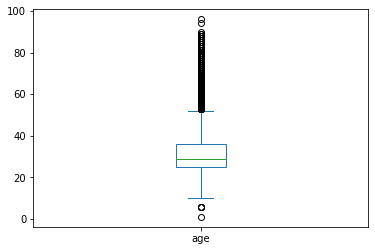

In [86]:
gender_age_train['age'].plot(kind='box')

**From above box plot we can see there are outliers in age column. 1,6,94 and 96 years are outliers . we need to fix this by mapping the corresponding values in age column with index of respecting age / gender / group**

In [87]:
gender_age_train.loc[(gender_age_train['age']>= 91)]

device_id gender  age group
5958  -7047596037344697961      F   96  F43+
60872  1177477789654193646      F   94  F43+

In [88]:
age_6 =gender_age_train.loc[(gender_age_train['age'] <= 6)]
age_6

device_id gender  age group
10385  3553057874282315257      M    1  M22-
60779 -8513863533705424532      M    6  M22-
60831 -5323874218045578676      M    6  M22-
60832  3646841514566479686      M    6  M22-
60833  5222152119137955379      M    6  M22-

In [89]:
age_6.groupby(['group'])['age','device_id','gender'].nunique()

age  device_id  gender
group                        
M22-     2          5       1

In [90]:
# import plotly.offline as pyoff
# plot_data = [
#     go.Box(
#         x=gender_age_train['age'],fillcolor='rgba(219, 64, 82, 0.6)',)]

# plot_layout = go.Layout(
#         title='Age')
# fig = go.Figure(data=plot_data, layout=plot_layout)
# pyoff.iplot(fig)

In [91]:
gender_age_train[(gender_age_train['age'] == 6) | ((gender_age_train['age'] == 88) & (gender_age_train['group'] == 'F43+'))]

device_id gender  age group
3065  -5773450219741882297      F   88  F43+
3068  -8881071865742467804      F   88  F43+
3560  -4648373198049034564      F   88  F43+
60779 -8513863533705424532      M    6  M22-
60831 -5323874218045578676      M    6  M22-
60832  3646841514566479686      M    6  M22-
60833  5222152119137955379      M    6  M22-

In [92]:
# mapping the index for age 1, 6 with age of 10 of male in M22- group 
gender_age_train.loc[10385 ,'age'] = gender_age_train.loc[15107,'age']
gender_age_train.loc[60779,'age'] = gender_age_train.loc[15107,'age']
gender_age_train.loc[60831 ,'age'] = gender_age_train.loc[15107,'age']
gender_age_train.loc[60832 ,'age'] = gender_age_train.loc[15107,'age']
gender_age_train.loc[60833 ,'age'] = gender_age_train.loc[15107,'age']

# mapping the index for the age 94 & 96  with age 88 of female in F43+ group 
gender_age_train.loc[5958 ,'age'] = gender_age_train.loc[3065,'age']
gender_age_train.loc[60872 ,'age'] = gender_age_train.loc[3065,'age']



In [93]:
gender_age_train.loc[(gender_age_train['age'] <= 6) | (gender_age_train['age'] >=91)]

Empty DataFrame
Columns: [device_id, gender, age, group]
Index: []

In [94]:
print('Min age is : ',gender_age_train['age'].min())
print('Max age is : ', gender_age_train['age'].max())

Min age is :  10
Max age is :  90


**No outliers in age column now**

<a name = Section6.5></a>
### 6.5 Extracting Data for target states from the Event Data For EDA 


In [95]:
# Selecting target states for analysis 
event_data_new= event_data.loc[event_data['state'].isin(['TamilNadu', 'Manipur','Chandigarh', 'Tripura', 'UttarPradesh','ArunachalPradesh'])]
event_data_new.shape

(533515, 7)

In [96]:
event_data_new.isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

In [97]:
#Converting Device_Id column of gender_age_tarin and phone_model dataset to float for smooth merging with event_data.
gender_age_train['device_id'] = gender_age_train['device_id'].astype('float')
phone_model['device_id'] = phone_model['device_id'].astype('float')

In [98]:
# Converting timestamp dtype to datetime from objrct
event_data_new['timestamp'] = pd.to_datetime(event_data_new['timestamp'])
event_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533515 entries, 3 to 3252949
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   event_id   533515 non-null  int64         
 1   device_id  533515 non-null  float64       
 2   timestamp  533515 non-null  datetime64[ns]
 3   longitude  533515 non-null  float64       
 4   latitude   533515 non-null  float64       
 5   city       533515 non-null  object        
 6   state      533515 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 32.6+ MB


**Final Observations after cleaning Data**

1. Replaced **missing values** present in **State** column of **event_date** with corresponding city value for missing states.


2. Replaced **missing values** present in **device_id** columns of **event_data** with the help of corresponding **latitude** value to populate the missing **device_id**. 


3. Replaced **missing values** present in **longitude and latitude** columns of **event_data** with the help of corresponding **device_id**. 


4.  There were some discrepancy in latitude abnd longitude in event_data for target states('TamilNadu','Manipur','Chandigarh','Tripura','UttarPradesh', 'ArunachalPradesh') . Found these discripancy with the help of plotly and folium libraries.Fixed the outliers in lat and long of TamilNadu and UttarPradesh with help of same device_id.


5. For TamilNadu we found that 9 rows have incorrect lat & long data, we have replaced with correct longitude and latitude for the same device_id.


6. For UttarPradesh we found that one of the city named 'Kadi' has inccorect state . Actually it is part of Gujarat state but in event data its mentioned as UttarPradesh. This has been fixed with updating 947 rows of Kadi city to Gujarat state from UttarPradesh state.


7. Translated **Chinese** name present in **phone_brand** and **device_model** of phone_model dataset with equivalent English name.


8. There were outliers in age column- 1,6,94 and 96 years are outliers . we replaced these values by mapping the index of corresponding values in age / group/gender column.


9. Converted the dtype of device_id in gender_age_train and phone_model dataset from INT to FLOAT.


10. Converted the dtype of timestamp column to Datetime from object.


11. Filtered the states based on target states (TamilNadu','Manipur','Chandigarh','Tripura','UttarPradesh','ArunachalPradesh').




<a name = Section6.6></a>
###  6.6 Merging of all Datasets For EDA 

In [99]:
# Merging all the three data in to one final data for EDA 
# Merging datasets on device_id ( default as inner join : to get all the information of user 
# on the event loged on the device id . 

data =event_data_new.merge(phone_model,on='device_id')
telecom_data = data.merge(gender_age_train,on='device_id')
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533515 entries, 0 to 533514
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   event_id      533515 non-null  int64         
 1   device_id     533515 non-null  float64       
 2   timestamp     533515 non-null  datetime64[ns]
 3   longitude     533515 non-null  float64       
 4   latitude      533515 non-null  float64       
 5   city          533515 non-null  object        
 6   state         533515 non-null  object        
 7   phone_brand   533515 non-null  object        
 8   device_model  533515 non-null  object        
 9   gender        533515 non-null  object        
 10  age           533515 non-null  int64         
 11  group         533515 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 52.9+ MB


<a name = #Section7></a>
### 7. Data Post-Profiling

In [100]:
# profile = ProfileReport(df = telecom_data)
# profile.to_file(output_file = 'Post Profiling Report-telecom data.html')
# print('Accomplished!')

**Observations**

- There are **12 variables** with **533515** observations.
- There are **5 numeric ,1 datetime and 6 categorical** variables.
- No **missing values** present in data.
- Data has **201** different **cities** out of which maximum users are found in **Chennai (68.8%).**
- Data has **6** different states out of which maximum users are from **TamilNadu (81.8%).**
- **Phone_Brand** contains **81** different brand information out of which **Xiaomi(32.6%)** is preferred by most users followed by **Samsung, Huawei, vivo ,Meizu and then OPPO**
- **Male** mobile users are **more** compared to **Female** users **(67.6% Male users and 32% Female users)**
- **Age** column is **right-skewed** with minimum value of 10 and maximum value of 89
- **device_model** has a **high cardinality: 897 distinct values**	
- **state** is **highly correlated** with **longitude and longitude.**
- **phone_brand** is **highly correlated** with **device_id ,age and group.**
- Maximum users for this network are **Male** which are aged between **32 to 38**. Female users are not preferring this network much compare to male users.
- **event_id** has **unique** values means **no duplicate rows**

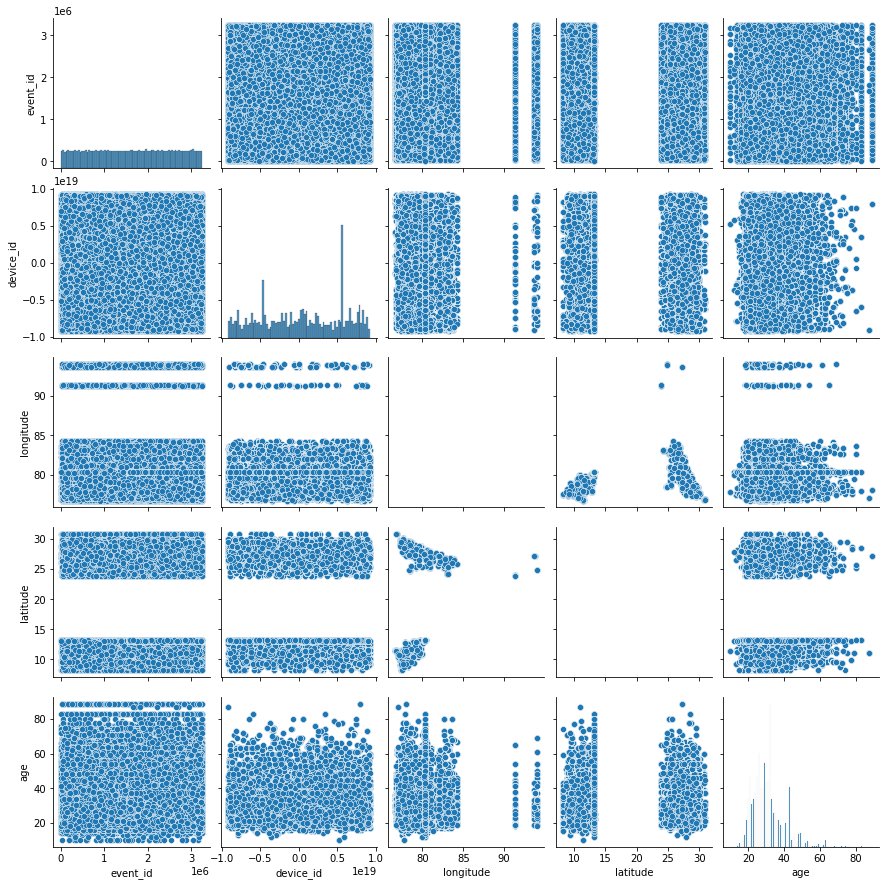

In [101]:
sns.pairplot(telecom_data)

<AxesSubplot:>

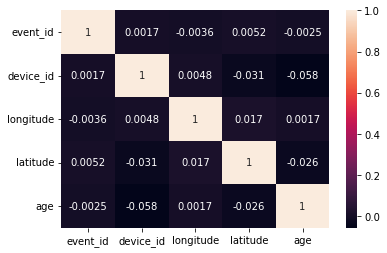

In [102]:
sns.heatmap(telecom_data.corr(), annot = True)

<a name = #Section8></a>
### 8. Exploratory Data Analysis on Final Data 

### Q1. Distribution of Users(device_id) across States

In [103]:
device = telecom_data.groupby(['state'])['device_id'].nunique().sort_values(ascending = False)
device.head(10)

state
TamilNadu           5770
UttarPradesh        3635
Tripura               36
Chandigarh            35
ArunachalPradesh      32
Manipur               30
Name: device_id, dtype: int64

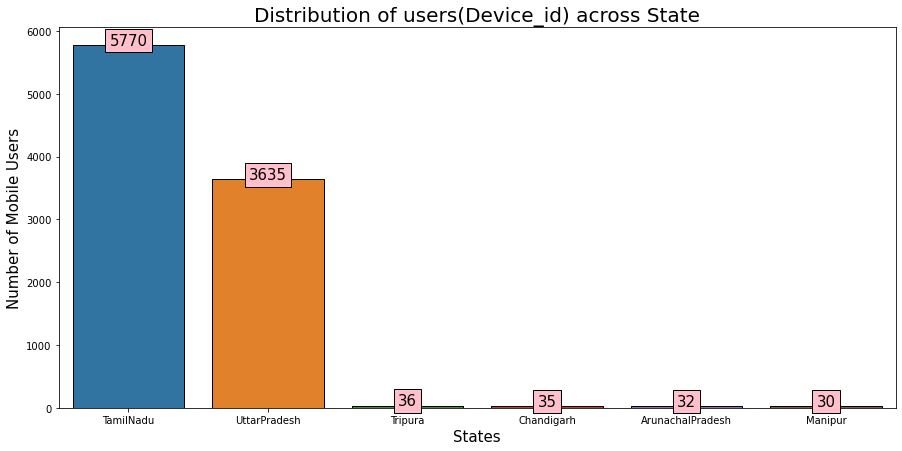

In [104]:
fig = plt.figure(figsize = [15,7])

x = device.index
y = device.values

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],fontsize = 15 ,horizontalalignment = 'center', color = 'black' ,Bbox = dict(facecolor = 'pink', alpha = 1))

sns.barplot(x,y, edgecolor='black')

addlabels(x,y)

plt.ylabel("Number of Mobile Users",fontsize=15)
plt.xlabel("States",fontsize=15)
plt.title("Distribution of users(Device_id) across State",fontsize=20)
plt.show()

### Q2. Distribution of users across phone brands (Top 10 phone brands )

In [105]:
ph_brand = telecom_data.groupby(['phone_brand'])['device_id'].nunique().sort_values(ascending=False)[:10]
ph_brand

phone_brand
Xiaomi     2405
Samsung    2133
Huawei     1502
vivo        881
OPPO        686
Meizu       589
Cool        473
HTC         148
Lenovo      111
LeTV         84
Name: device_id, dtype: int64

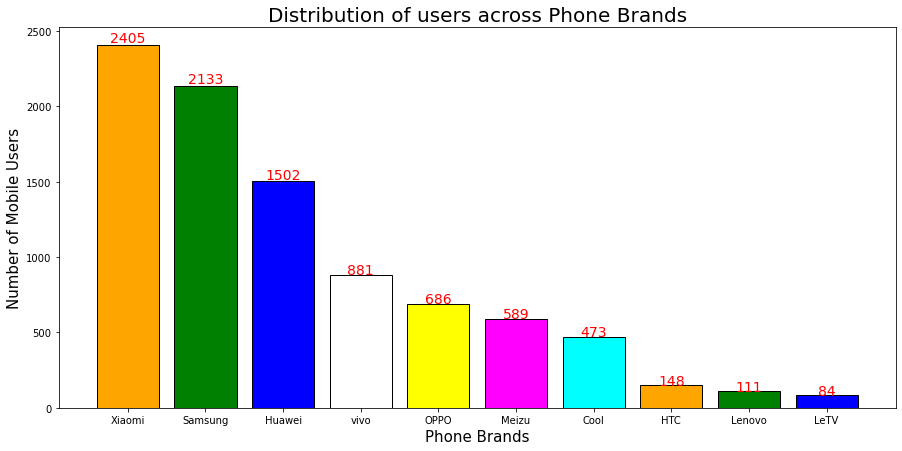

In [106]:
fig = plt.figure(figsize = [15,7])

x = ph_brand.index 
y = ph_brand.values
colors = ["orange","green","blue","white","yellow","magenta","cyan"]
figure = fig.add_subplot(1,1,1)
bar_chart = figure.bar(x,y ,edgecolor = 'black' , color = colors)

for bar in bar_chart:
    height = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2.0 , height*1.01 , s= '{}' .format(str(height)),horizontalalignment = 'center', rotation = 0 , size = 14 , color = 'red')
    


plt.ylabel("Number of Mobile Users",fontsize=15)
plt.xlabel("Phone Brands",fontsize=15)
plt.title("Distribution of users across Phone Brands",fontsize=20)
plt.show()

 We can see from above plot that **xiaomi phone brand** is used more compare to other brand . 

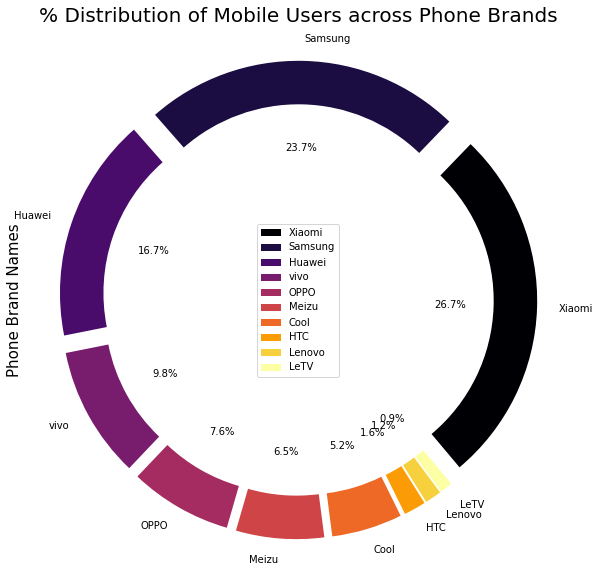

In [107]:
ph_brand.plot(kind = 'pie',figsize = [10,10],explode = np.ones(10)/10 ,autopct= '%3.1f%%',legend=True, wedgeprops={'width':0.20},
                                                                       shadow=False,cmap='inferno',startangle=310)
plt.ylabel("Phone Brand Names",fontsize=15)
plt.title("% Distribution of Mobile Users across Phone Brands",fontsize=20)
plt.show()

**There are around 27% of users uses Xiaomi brand , 24% uses Samsung and 17% uses Huawei.These 3 companies comprise more than 68% of market share in these 6 states.**

### Q3. Distribution of Users across Gender

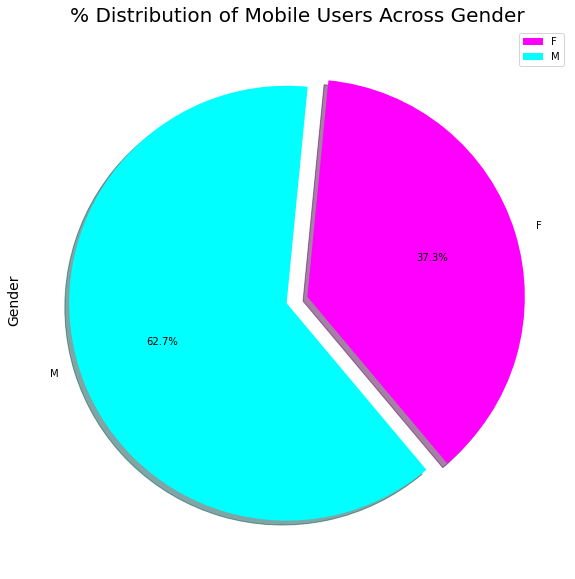

In [108]:
gender = telecom_data.groupby(['gender'])['device_id'].nunique()
gender.plot(kind ='pie',figsize = [10,10],explode = [0.05,0.05],shadow = True ,autopct= '%3.1f%%',legend=True,cmap='cool_r',startangle=310)

plt.ylabel("Gender",fontsize=14)
plt.title("% Distribution of Mobile Users Across Gender",fontsize=20)
plt.show()

### Q4.Distribution of Users across Age Segments.

In [128]:
telecom_data['age'].value_counts().sort_index()

10       38
12        7
13       29
14      220
15     1377
16      972
17     2574
18     4587
19    10024
20    18280
21    26372
22    16150
23    17899
24    20839
25    27000
26    35541
27    22218
28    22332
29    31534
30    24561
31    25286
32    53993
33    18172
34    12839
35    13330
36    10304
37    10287
38     8222
39     7847
40     6246
41     8911
42     6503
43    22680
44     2657
45     3830
46     4911
47     2184
48     4686
49     5323
50     1777
51     2595
52     1531
53     2248
54     1936
55      661
56      325
57      488
58      340
59      951
60     1345
61      645
62      801
63     2474
64      521
65      145
66      732
67      125
68      151
69      502
70        1
71      112
72      209
73      320
74      423
75       17
76      885
77       34
78       22
79        5
80       34
83      210
87        7
89      178
Name: age, dtype: int64

In [161]:
telecom_data['group'].value_counts().sort_index()

F23-      34240
F24-26    32247
F27-28    16456
F29-32    34721
F33-42    32797
F43+      22623
M22-      51308
M23-26    64114
M27-28    28094
M29-31    53255
M32-38    97755
M39+      65905
Name: group, dtype: int64

In [169]:
bins = ['10-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80','81-90']

telecom_data['age_segment'] = pd.cut(telecom_data['age'] ,[10,20,30,40,50,60,70,80,90] , right = True , labels = bins)

telecom_data['age_segment'] = telecom_data['age_segment'].astype('category')

lens = telecom_data.copy()

In [170]:
lens['age_segment'].value_counts()

21-30    244446
31-40    166526
41-50     63462
10-20     38070
51-60     12420
61-70      6097
71-80      2061
81-90       395
Name: age_segment, dtype: int64

In [171]:
age = lens.groupby(['age_segment'])['device_id'].nunique().sort_values(ascending=False)
age

age_segment
21-30    4843
31-40    2456
41-50     957
10-20     753
51-60     343
61-70     148
71-80      33
81-90       4
Name: device_id, dtype: int64

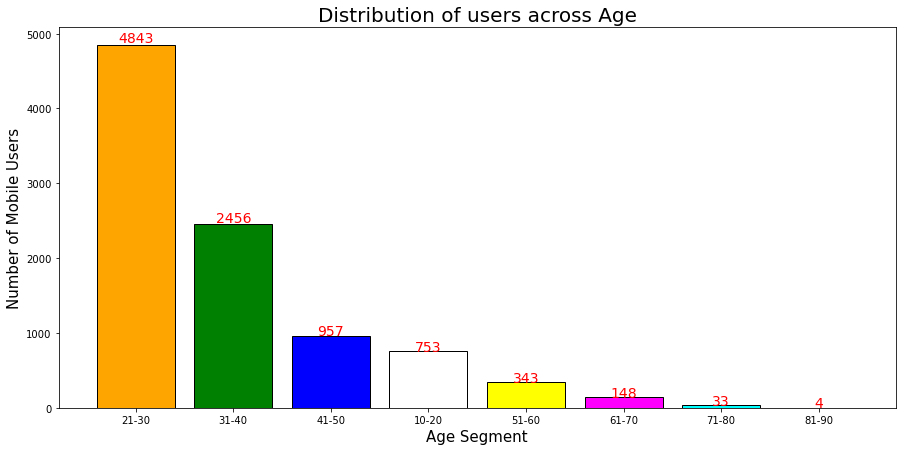

In [173]:
fig = plt.figure(figsize = [15,7])

x = age.index 
y = age.values
colors = ["orange","green","blue","white","yellow","magenta","cyan"]
figure = fig.add_subplot(1,1,1)
bar_chart = figure.bar(x,y ,edgecolor = 'black' , color = colors)

for bar in bar_chart:
    height = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2.0 , height*1.01 , s= '{}' .format(str(height)),horizontalalignment = 'center', rotation = 0 , size = 14 , color = 'red')
    


plt.ylabel("Number of Mobile Users",fontsize=15)
plt.xlabel("Age Segment",fontsize=15)
plt.title("Distribution of users across Age",fontsize=20)
plt.show()

### Q5.Distribution of Phone Brands(Consider only the 10 Most used Phone Brands) for each Age Segment, State, and Gender.

In [192]:
brand = telecom_data.groupby(['phone_brand'])['device_id'].nunique().sort_values(ascending = False)[:10].index.to_list()
brand


['Xiaomi',
 'Samsung',
 'Huawei',
 'vivo',
 'OPPO',
 'Meizu',
 'Cool',
 'HTC',
 'Lenovo',
 'LeTV']

In [193]:
telecom_data[telecom_data['phone_brand'].isin(brand)].groupby(['state','gender','age_segment','phone_brand'])['device_id'].nunique()

state             gender  age_segment  phone_brand
ArunachalPradesh  F       10-20        Cool             0
                                       HTC              0
                                       Huawei           0
                                       LeTV             0
                                       Lenovo           0
                                       Meizu            0
                                       OPPO             0
                                       Samsung          0
                                       Xiaomi           0
                                       vivo             0
                          21-30        Cool             0
                                       HTC              0
                                       Huawei           2
                                       LeTV             0
                                       Lenovo           0
                                       Meizu            0
                     

### Q6.Distribution of Gender for each State, Age Segment and Phone Brand(Consider only the 10 Most used Phone Brands).

### Q7.Distribution of Age Segments for each State, Gender and Phone Brand(Consider only the 10 Most used Phone Brands).

### Q8. Hourly distribution of Phone Calls.

### Q9. Plot the Users on the Map using any suitable package.

<AxesSubplot:>

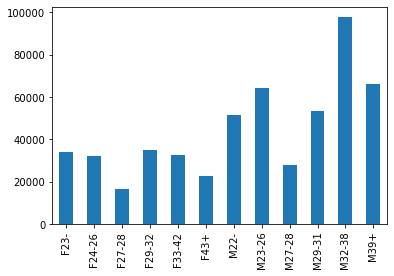

In [109]:
telecom_data['group'].value_counts().sort_index().plot(kind='bar')

We can see from above plot that age group of 32 to 38 years male users uses more mobile compare to other group. 

<AxesSubplot:xlabel='device_model'>

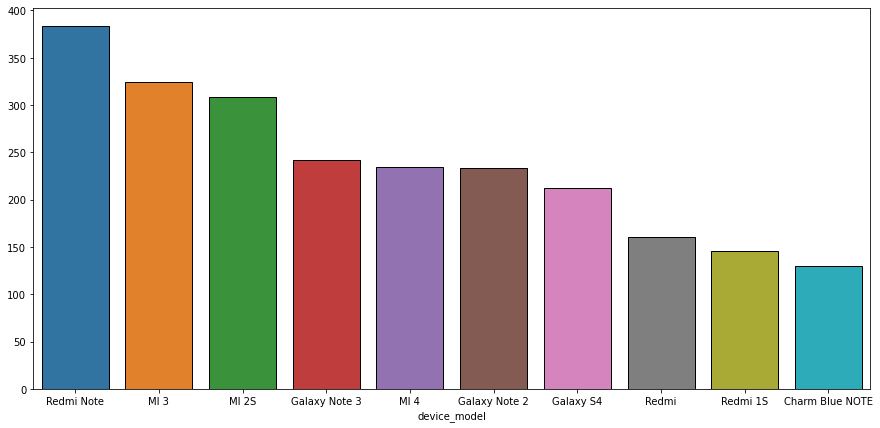

In [110]:
top_10 = telecom_data.groupby(['device_model'])['device_id'].nunique().sort_values(ascending =False )[:10]
fig = plt.figure(figsize =[15,7])
sns.barplot(x = top_10.index,y = top_10.values,edgecolor='black')

In [111]:
top_10


device_model
Redmi Note         383
MI 3               324
MI 2S              308
Galaxy Note 3      242
MI 4               235
Galaxy Note 2      233
Galaxy S4          212
Redmi              161
Redmi 1S           146
Charm Blue NOTE    130
Name: device_id, dtype: int64